In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('bengaluru_combined.csv')
df.head()

,Timestamp,Location,PM2.5,PM10,NO2,NH3,SO2,CO,O3
0,01-01-2020,Bengaluru - Silk Board,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-2020,Bengaluru - Silk Board,43.67,134.00,20.28,10.98,3.41,0.91,21.82
2,03-01-2020,Bengaluru - Silk Board,30.58,74.42,15.17,12.10,3.27,0.96,23.31
3,04-01-2020,Bengaluru - Silk Board,66.35,155.68,42.90,11.75,3.26,2.54,29.70
4,05-01-2020,Bengaluru - Silk Board,48.00,99.13,18.56,9.79,2.95,1.14,31.01


In [3]:
df.isnull().sum()

Timestamp      0
Location       0
PM2.5         73
PM10          74
NO2          113
NH3          112
SO2          152
CO            74
O3           136
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1827 non-null   object 
 1   Location   1827 non-null   object 
 2   PM2.5      1754 non-null   float64
 3   PM10       1753 non-null   float64
 4   NO2        1714 non-null   float64
 5   NH3        1715 non-null   float64
 6   SO2        1675 non-null   float64
 7   CO         1753 non-null   float64
 8   O3         1691 non-null   float64
dtypes: float64(7), object(2)
memory usage: 128.6+ KB


In [7]:
# Drop irrelevant columns
df.drop(columns=['Timestamp', 'Location'], inplace=True)

In [8]:
# Handle missing values by filling with median
df.fillna(df.median(), inplace=True)

In [9]:
# Select features and target (predicting PM2.5 levels)
X = df.drop(columns=['PM2.5'])
y = df['PM2.5']

In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on test data
y_pred = lr.predict(X_test)

In [13]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2:.4f}, Mean Squared Error: {mse:.4f}")

R2 Score: 0.0636, Mean Squared Error: 1097.7472


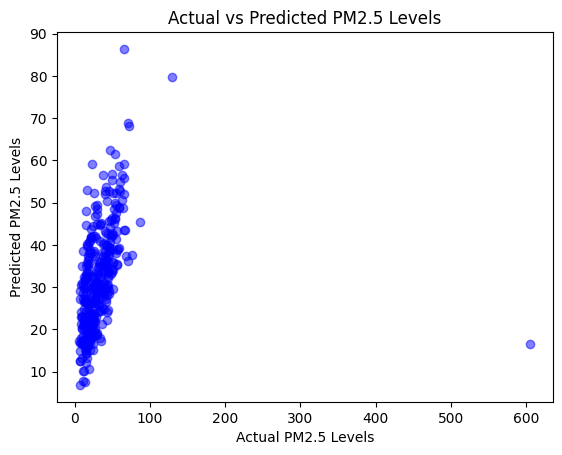

In [14]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual PM2.5 Levels")
plt.ylabel("Predicted PM2.5 Levels")
plt.title("Actual vs Predicted PM2.5 Levels")
plt.show()

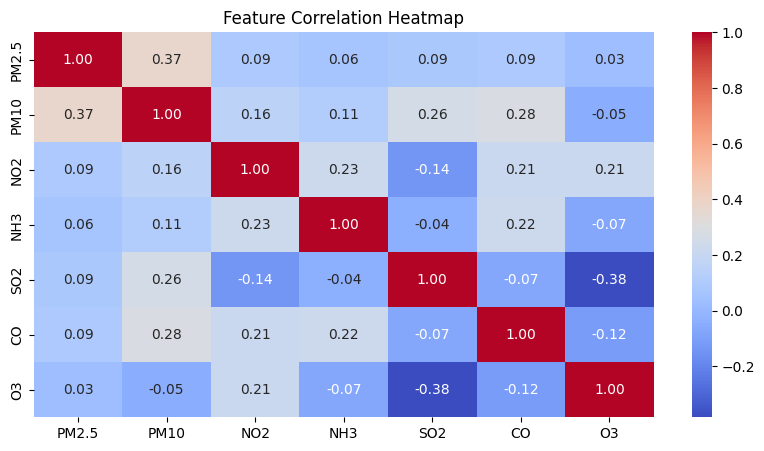

In [15]:
# Heatmap of correlations
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()